In [8]:
import numpy as np
import os
data_dir = '../data'

In [9]:
x_dataset = []
u_dataset = []

for item in os.listdir(data_dir):
    data_file_path = os.path.join(data_dir, item)

    # Check if the file is a directory
    if data_file_path.endswith('.npy') and os.path.exists(data_file_path):
        data_dict = np.load(data_file_path, allow_pickle=True).item()
        x_data = data_dict['signals'][:, :-6]
        if x_data.shape[0]!= 3417 or x_data.shape[1]!= 68:
            print("cannot load {data_file_path}")
        uu_data = data_dict['signals'][:, -4:]
        ErrorType = data_dict['ErrorType']
        u_data = np.concatenate((uu_data,np.tile( ErrorType, (len(x_data), 1))), axis=1)
        x_dataset.append(x_data)
        u_dataset.append(u_data)


In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Concatenate all arrays in x_dataset
x_dataset_concatenated = np.concatenate(x_dataset, axis=0)

# Remove columns 9, 39, 63
columns_to_remove = [9, 39, 63]
x_dataset_concatenated = np.delete(x_dataset_concatenated, columns_to_remove, axis=1)

# Rescale the dataset
scaler = StandardScaler()
x_dataset_concatenated = scaler.fit_transform(x_dataset_concatenated)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)  # Adjust n_components as needed
x_dataset_pca_transformed = pca.fit_transform(x_dataset_concatenated)

# Transform all arrays in x_dataset using the PCA transformer
x_dataset_pca = []
start_idx = 0
for x_data in x_dataset:
    end_idx = start_idx + x_data.shape[0]
    x_dataset_pca.append(x_dataset_pca_transformed[start_idx:end_idx])
    start_idx = end_idx

Shape of original concatenated dataset: (410040, 68)
Shape of PCA transformed dataset: (410040, 2)
Explained variance ratio of each principal component: [0.90014401 0.0996192 ]
Total explained variance: 0.9997632050248179


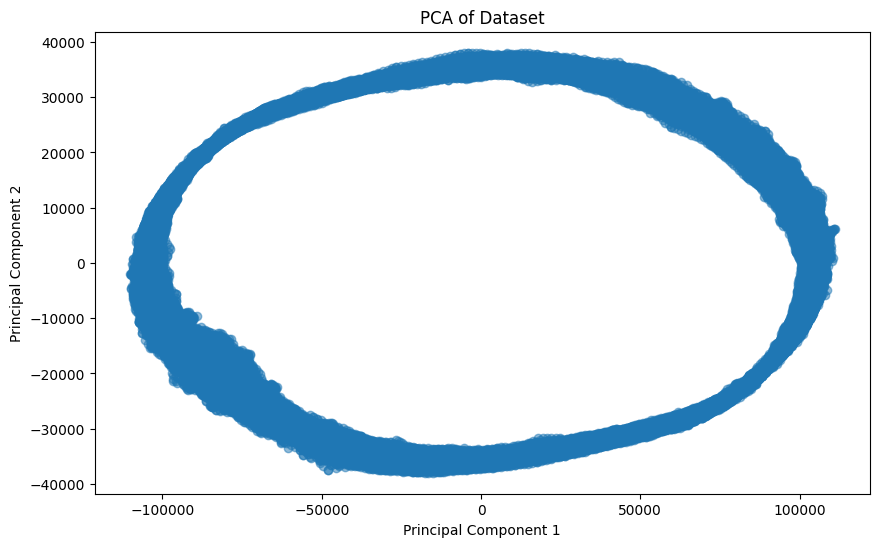

In [11]:
import matplotlib.pyplot as plt

# Verify the shape of the transformed data
print("Shape of original concatenated dataset:", x_dataset_concatenated.shape)
print("Shape of PCA transformed dataset:", x_dataset_pca_transformed.shape)

# Check the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio of each principal component:", explained_variance_ratio)
print("Total explained variance:", explained_variance_ratio.sum())

# Plot the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(x_dataset_pca_transformed[:, 0], x_dataset_pca_transformed[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.show()

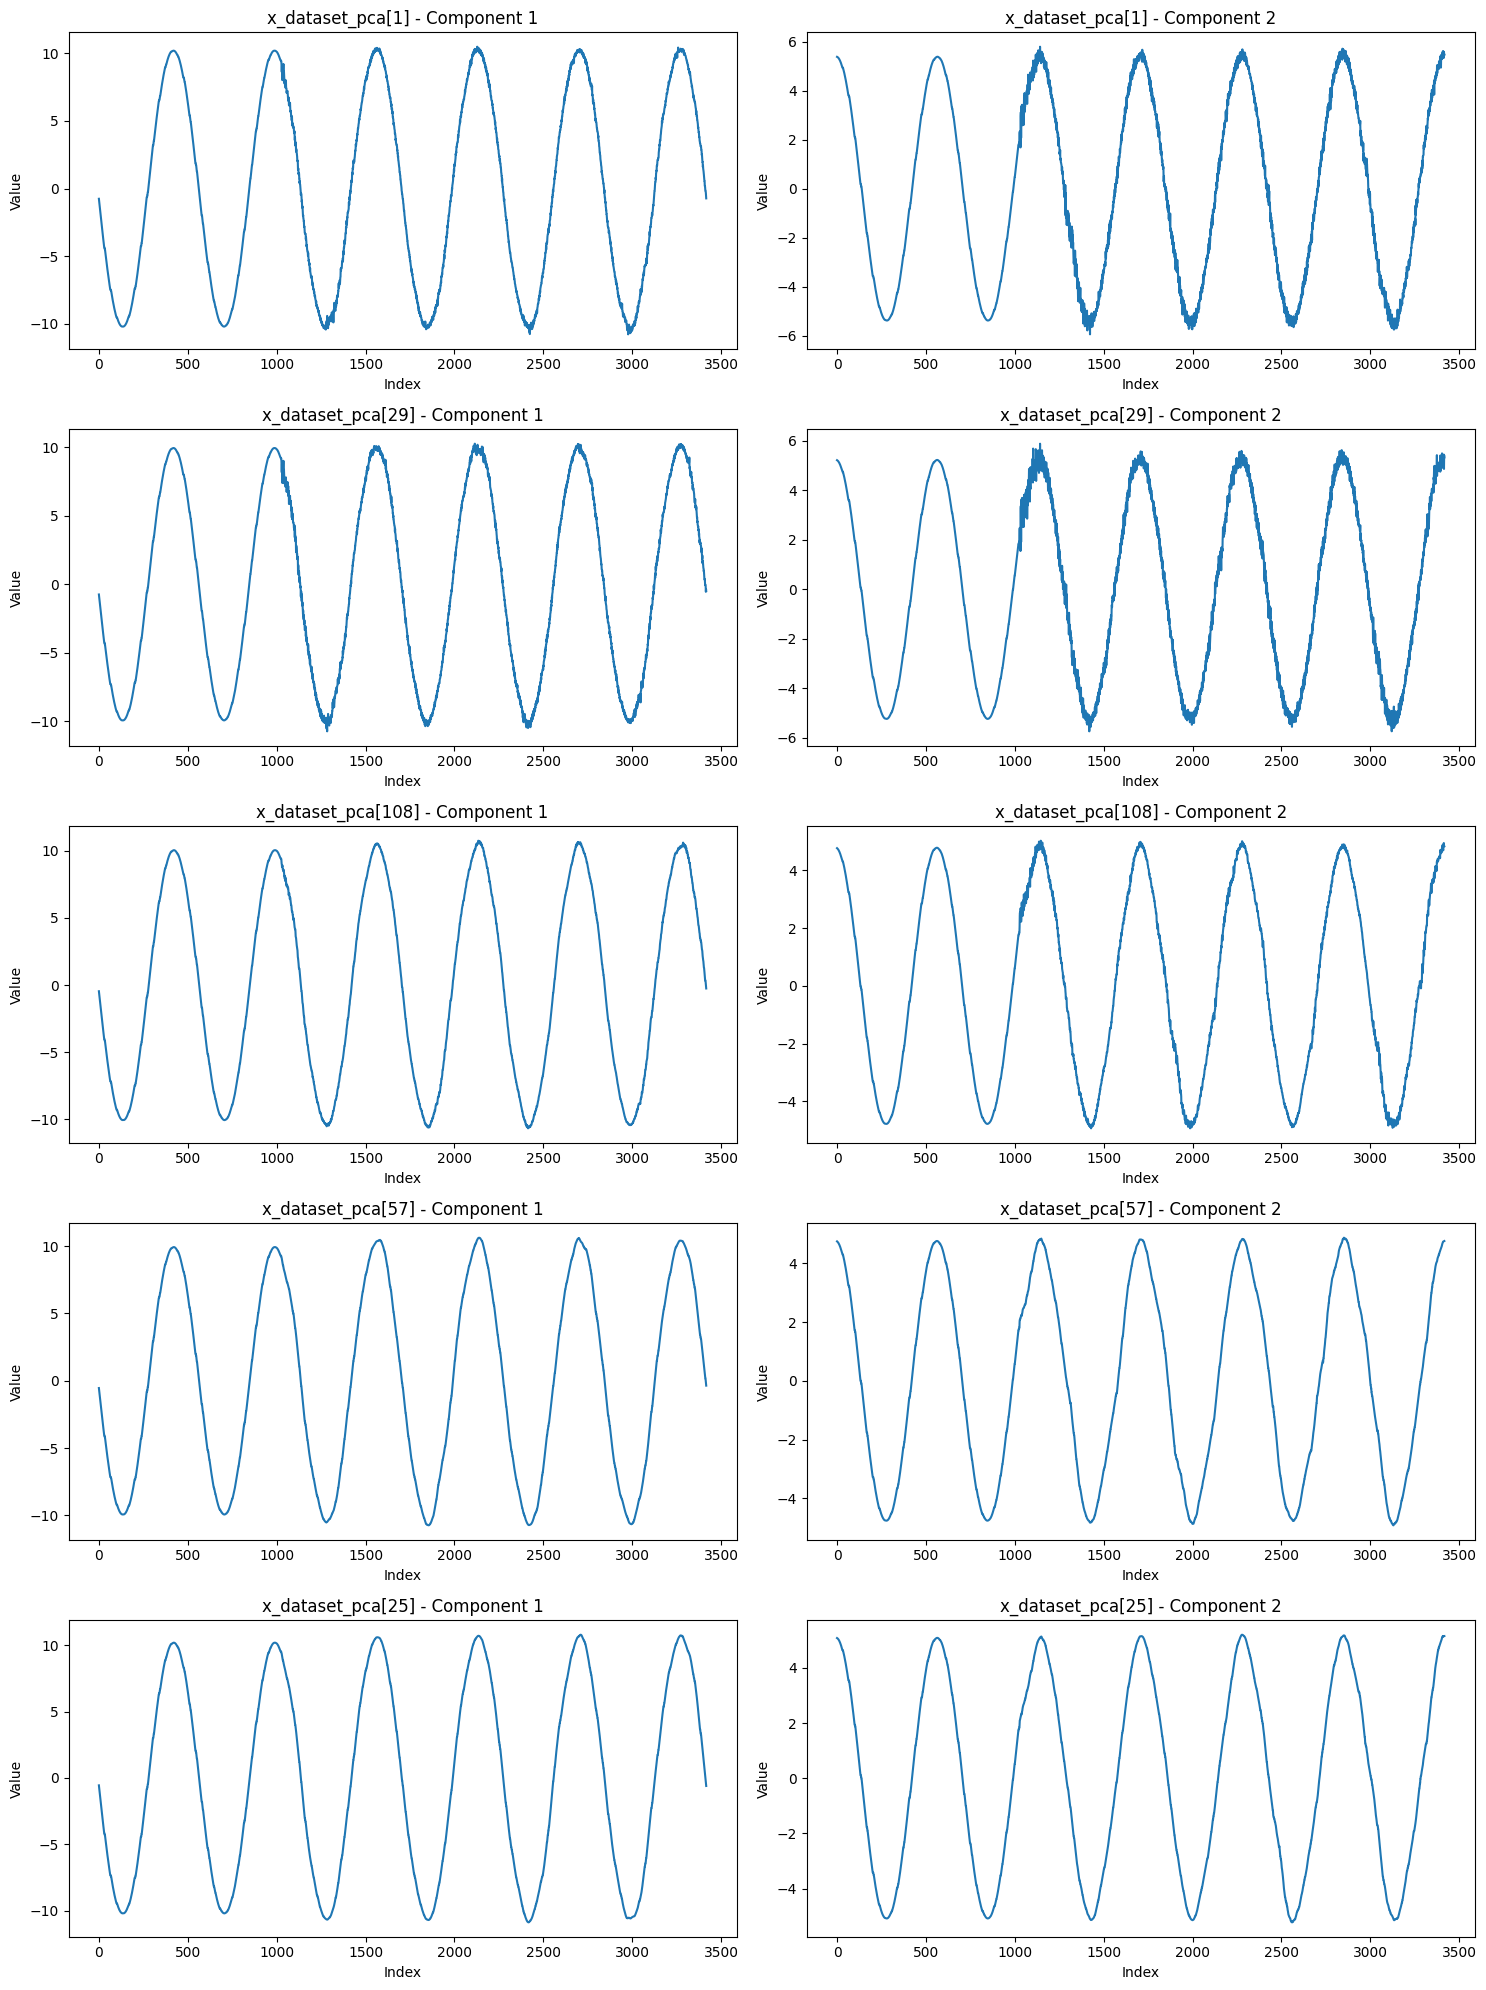

In [15]:
# Select random indices for plotting
random_indices = np.random.choice(len(x_dataset_pca), size=5, replace=False)

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))

for i, idx in enumerate(random_indices):
    axes[i, 0].plot(x_dataset_pca[idx][:, 0])
    axes[i, 0].set_title(f'x_dataset_pca[{idx}] - Component 1')
    axes[i, 0].set_xlabel('Index')
    axes[i, 0].set_ylabel('Value')

    axes[i, 1].plot(x_dataset_pca[idx][:, 1])
    axes[i, 1].set_title(f'x_dataset_pca[{idx}] - Component 2')
    axes[i, 1].set_xlabel('Index')
    axes[i, 1].set_ylabel('Value')

plt.tight_layout()
plt.show()

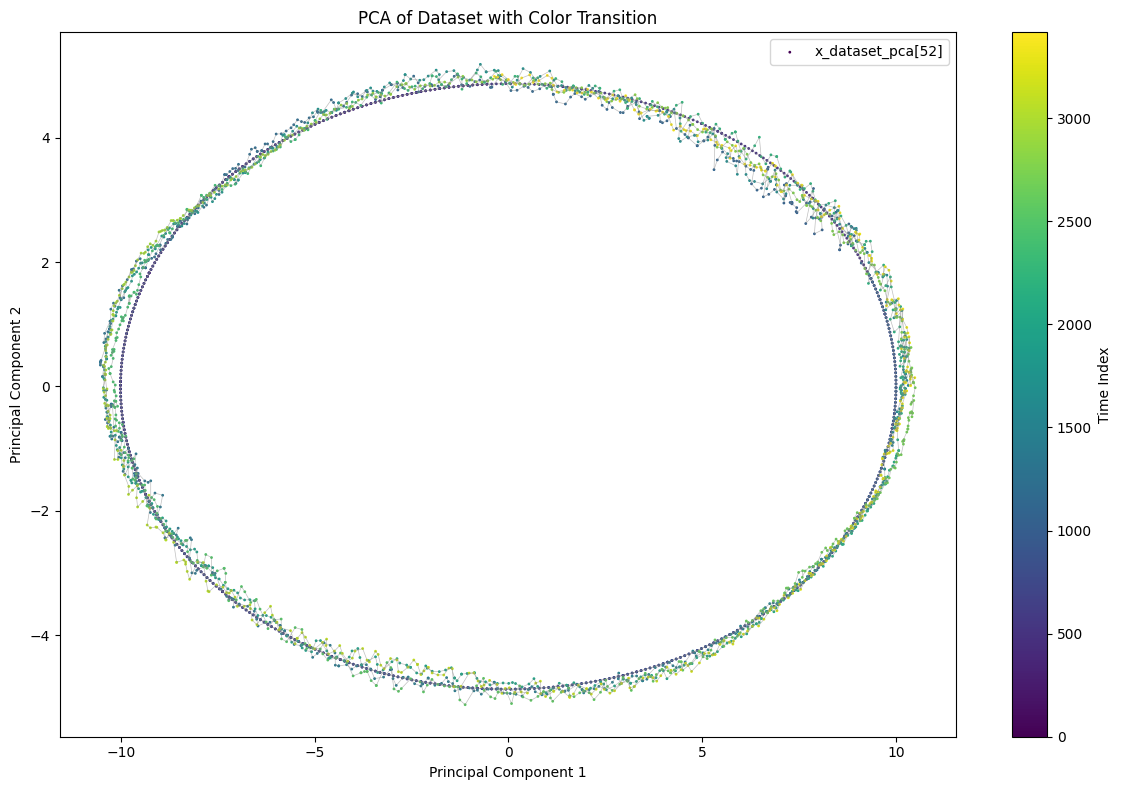

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Assuming x_dataset_pca is defined and contains time-ordered data
random_indices = np.random.choice(len(x_dataset_pca), size=1, replace=False)

fig, ax = plt.subplots(figsize=(12, 8))

for i, idx in enumerate(random_indices):
    data = x_dataset_pca[idx]
    time_indices = np.arange(len(data))  # Create time indices for colormap
    colors = cm.viridis(time_indices / max(time_indices))  # Normalize and map to colormap

    # Plot each point with its corresponding color
    scatter = ax.scatter(data[:, 0], data[:, 1], c=time_indices, cmap='viridis', s=1, label=f'x_dataset_pca[{idx}]')
    ax.plot(data[:, 0], data[:, 1], color='gray', alpha=0.5, linewidth=0.5)

# Add a color bar to show the mapping of time
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Time Index')  # Label for the color bar

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA of Dataset with Color Transition')
ax.legend()

plt.tight_layout()
plt.show()